### Thera Bank Loan Campaign

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style(style='darkgrid')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [19]:
df=pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 546.9 KB


    DESCRIPTIVE STATISTICS

In [21]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [22]:
df.isnull().values.any()

False

In [23]:
df['Education']=df['Education'].replace({1:'UG',2:'G',3:'AP'})

In [24]:
df.shape

(5000, 14)

In [25]:
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [26]:
## Number of People with Zero Mortgage
df_mortgage=df.apply(lambda x: True
        if x['Mortgage']==0 else False,axis=1)
m=len(df_mortgage[df_mortgage==True].index)
print("Number of People with Zero Mortgage is {}".format(m))

Number of People with Zero Mortgage is 3462


In [27]:
## Number of People with Zero Credit Card spending per month
df_CC=df.apply(lambda x: True
        if x['CCAvg']==0 else False,axis=1)
m=len(df_CC[df_CC==True].index)
print("Number of People with Zero Credit Card Spending Per Month is {}".format(m))


Number of People with Zero Credit Card Spending Per Month is 106


   Personal Loan
0           4520
1            480


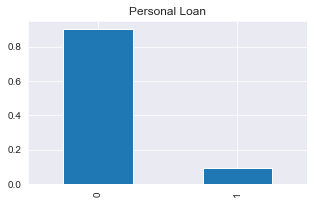

********************************************************

    Education
UG       2096
AP       1501
G        1403


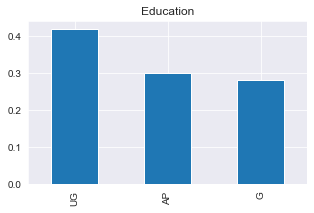

********************************************************

   Securities Account
0                4478
1                 522


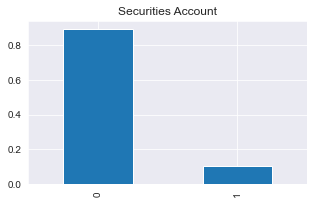

********************************************************

   CD Account
0        4698
1         302


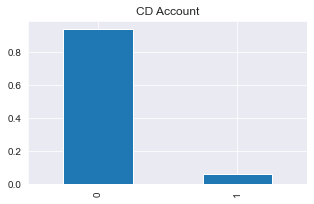

********************************************************

   Online
1    2984
0    2016


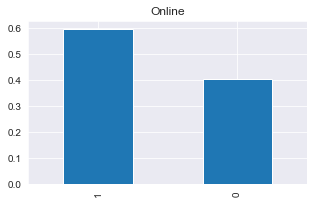

********************************************************

   CreditCard
0        3530
1        1470


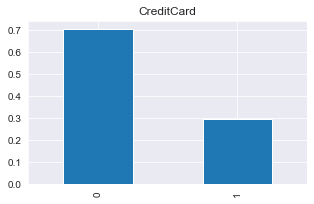

********************************************************



In [28]:
## value counts of all categorical columns
##cat_df=df[['Personal Loan','Securities Account','CD Account','Online','CreditCard']]
cat_df=df[['Personal Loan','Education','Securities Account','CD Account','Online','CreditCard']]
for i in cat_df.columns:
    print(pd.DataFrame(cat_df[i].value_counts()))
    cat_df[i].value_counts(normalize=True).plot.bar(figsize=(5,3),title=i)
    plt.show()
    print('********************************************************')
    print(                                                          )

#### Insights:
Clearly, this is an imbalanced dataset with an unequal representation of classes.

The majority class is 0 - Most customers did NOT accept the Personal Loan in the last campaign

In [29]:
## Calculate the Personal Loan Outcome 0/1 from the Target variable
n_true = len(df.loc[df['Personal Loan'] == 1])
n_false = len(df.loc[df['Personal Loan'] == 0])
true_per=(n_true/(n_true+n_false)) *100
false_per=(n_false/(n_true+n_false)) *100
print("Number of True Cases : {} {}".format(n_true,'('+str(true_per)+'%)'))
print("Number of False Cases : {} {}".format(n_false,'('+str(false_per)+'%)'))


Number of True Cases : 480 (9.6%)
Number of False Cases : 4520 (90.4%)


    UNIVARIATE PLOTS

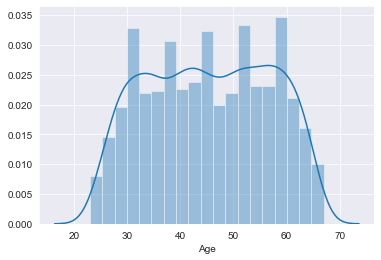

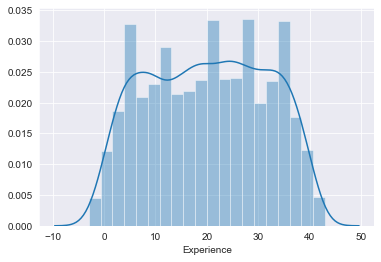

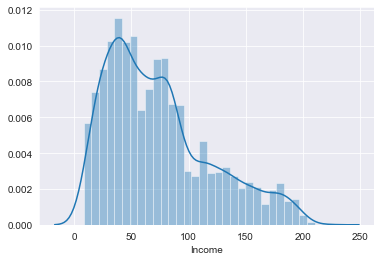

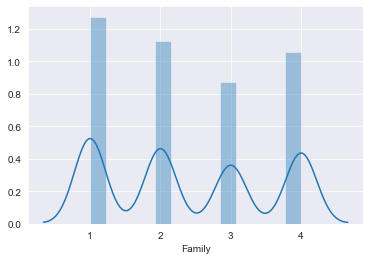

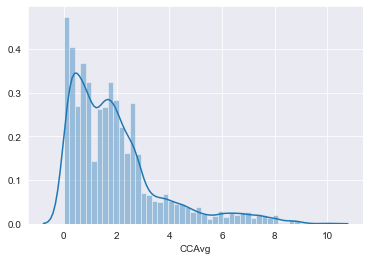

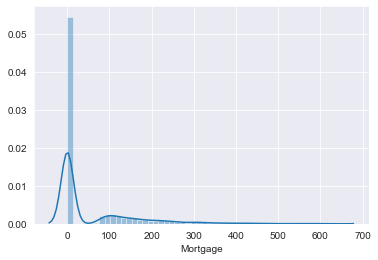

In [30]:
## Univariate Plots for Numerical Columns

num_df=df[['Age', 'Experience', 'Income', 'Family', 'CCAvg',
           'Mortgage']]

for i,col in enumerate(num_df.columns):
    sns.distplot(num_df[col])
    plt.show()
    

            BiVariate Plots

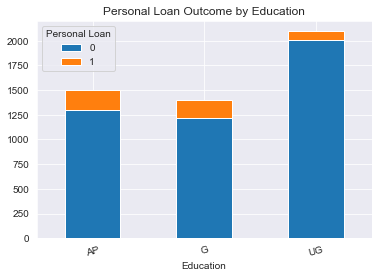

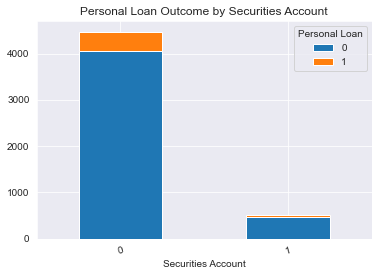

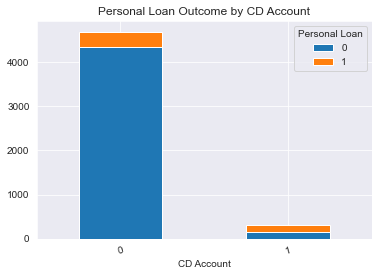

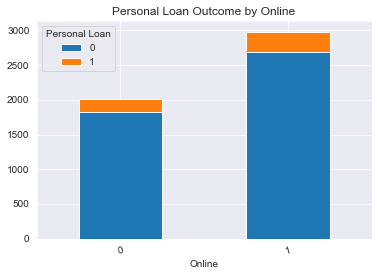

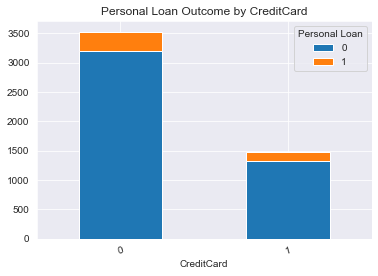

In [31]:
## Exploratory data Analysis
## Stacked chart to show the distribution of Personal Loan outcomes based on each categorical Variable
for col in cat_df.columns:
    if col !='Personal Loan':
        stack_df=pd.crosstab(cat_df[col],cat_df['Personal Loan'],rownames=[col],colnames=['Personal Loan'])
        stack_df.plot.bar(stacked=True,rot=15,title="Personal Loan Outcome by "+str(col))
        

#### Insights:

Customers with Advance/Professional degree have taken the most Personal Loans in the last campaign.

Out of all the customers who had a Certificate of Deposit (CD) account with the bank, 50% of them accepted Personal Loans in the last campaign


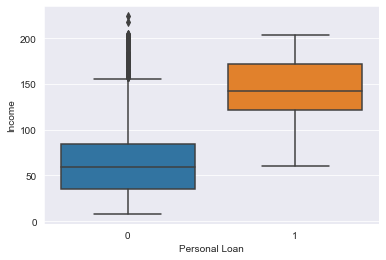

In [32]:
#Box plot for Numerical columns vs Personal loan
sns.boxplot(x='Personal Loan',y='Income',data=df)

#### Insights
Customers with high average Income tend to accept Personal Loans

Most Under Graduates, eventhough they have high Income, don't prefer taking Personal Loans

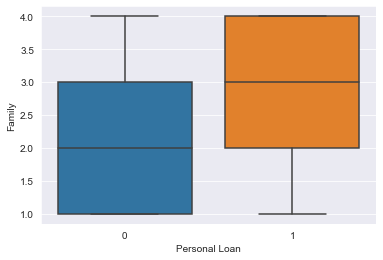

In [33]:
sns.boxplot(x='Personal Loan',y='Family',data=df)

#### Insights
Larger the family size, more Probabilistic are the customers to accept Personal Loans, With Average family size being 3

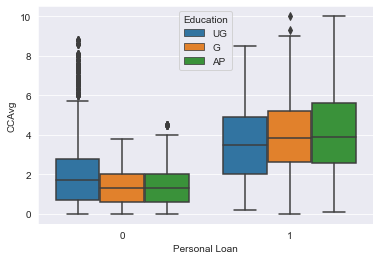

In [34]:
sns.boxplot(x='Personal Loan',y='CCAvg',hue='Education',data=df)

#### Insights
Customers with high Average Credit card Spending per month accepted Personal Loans in the Last campaign. 

(Outliers) Again, Many Under Graduates, despite having high Avg Credit Card Spending per month, do not prefer taking Personal Loans

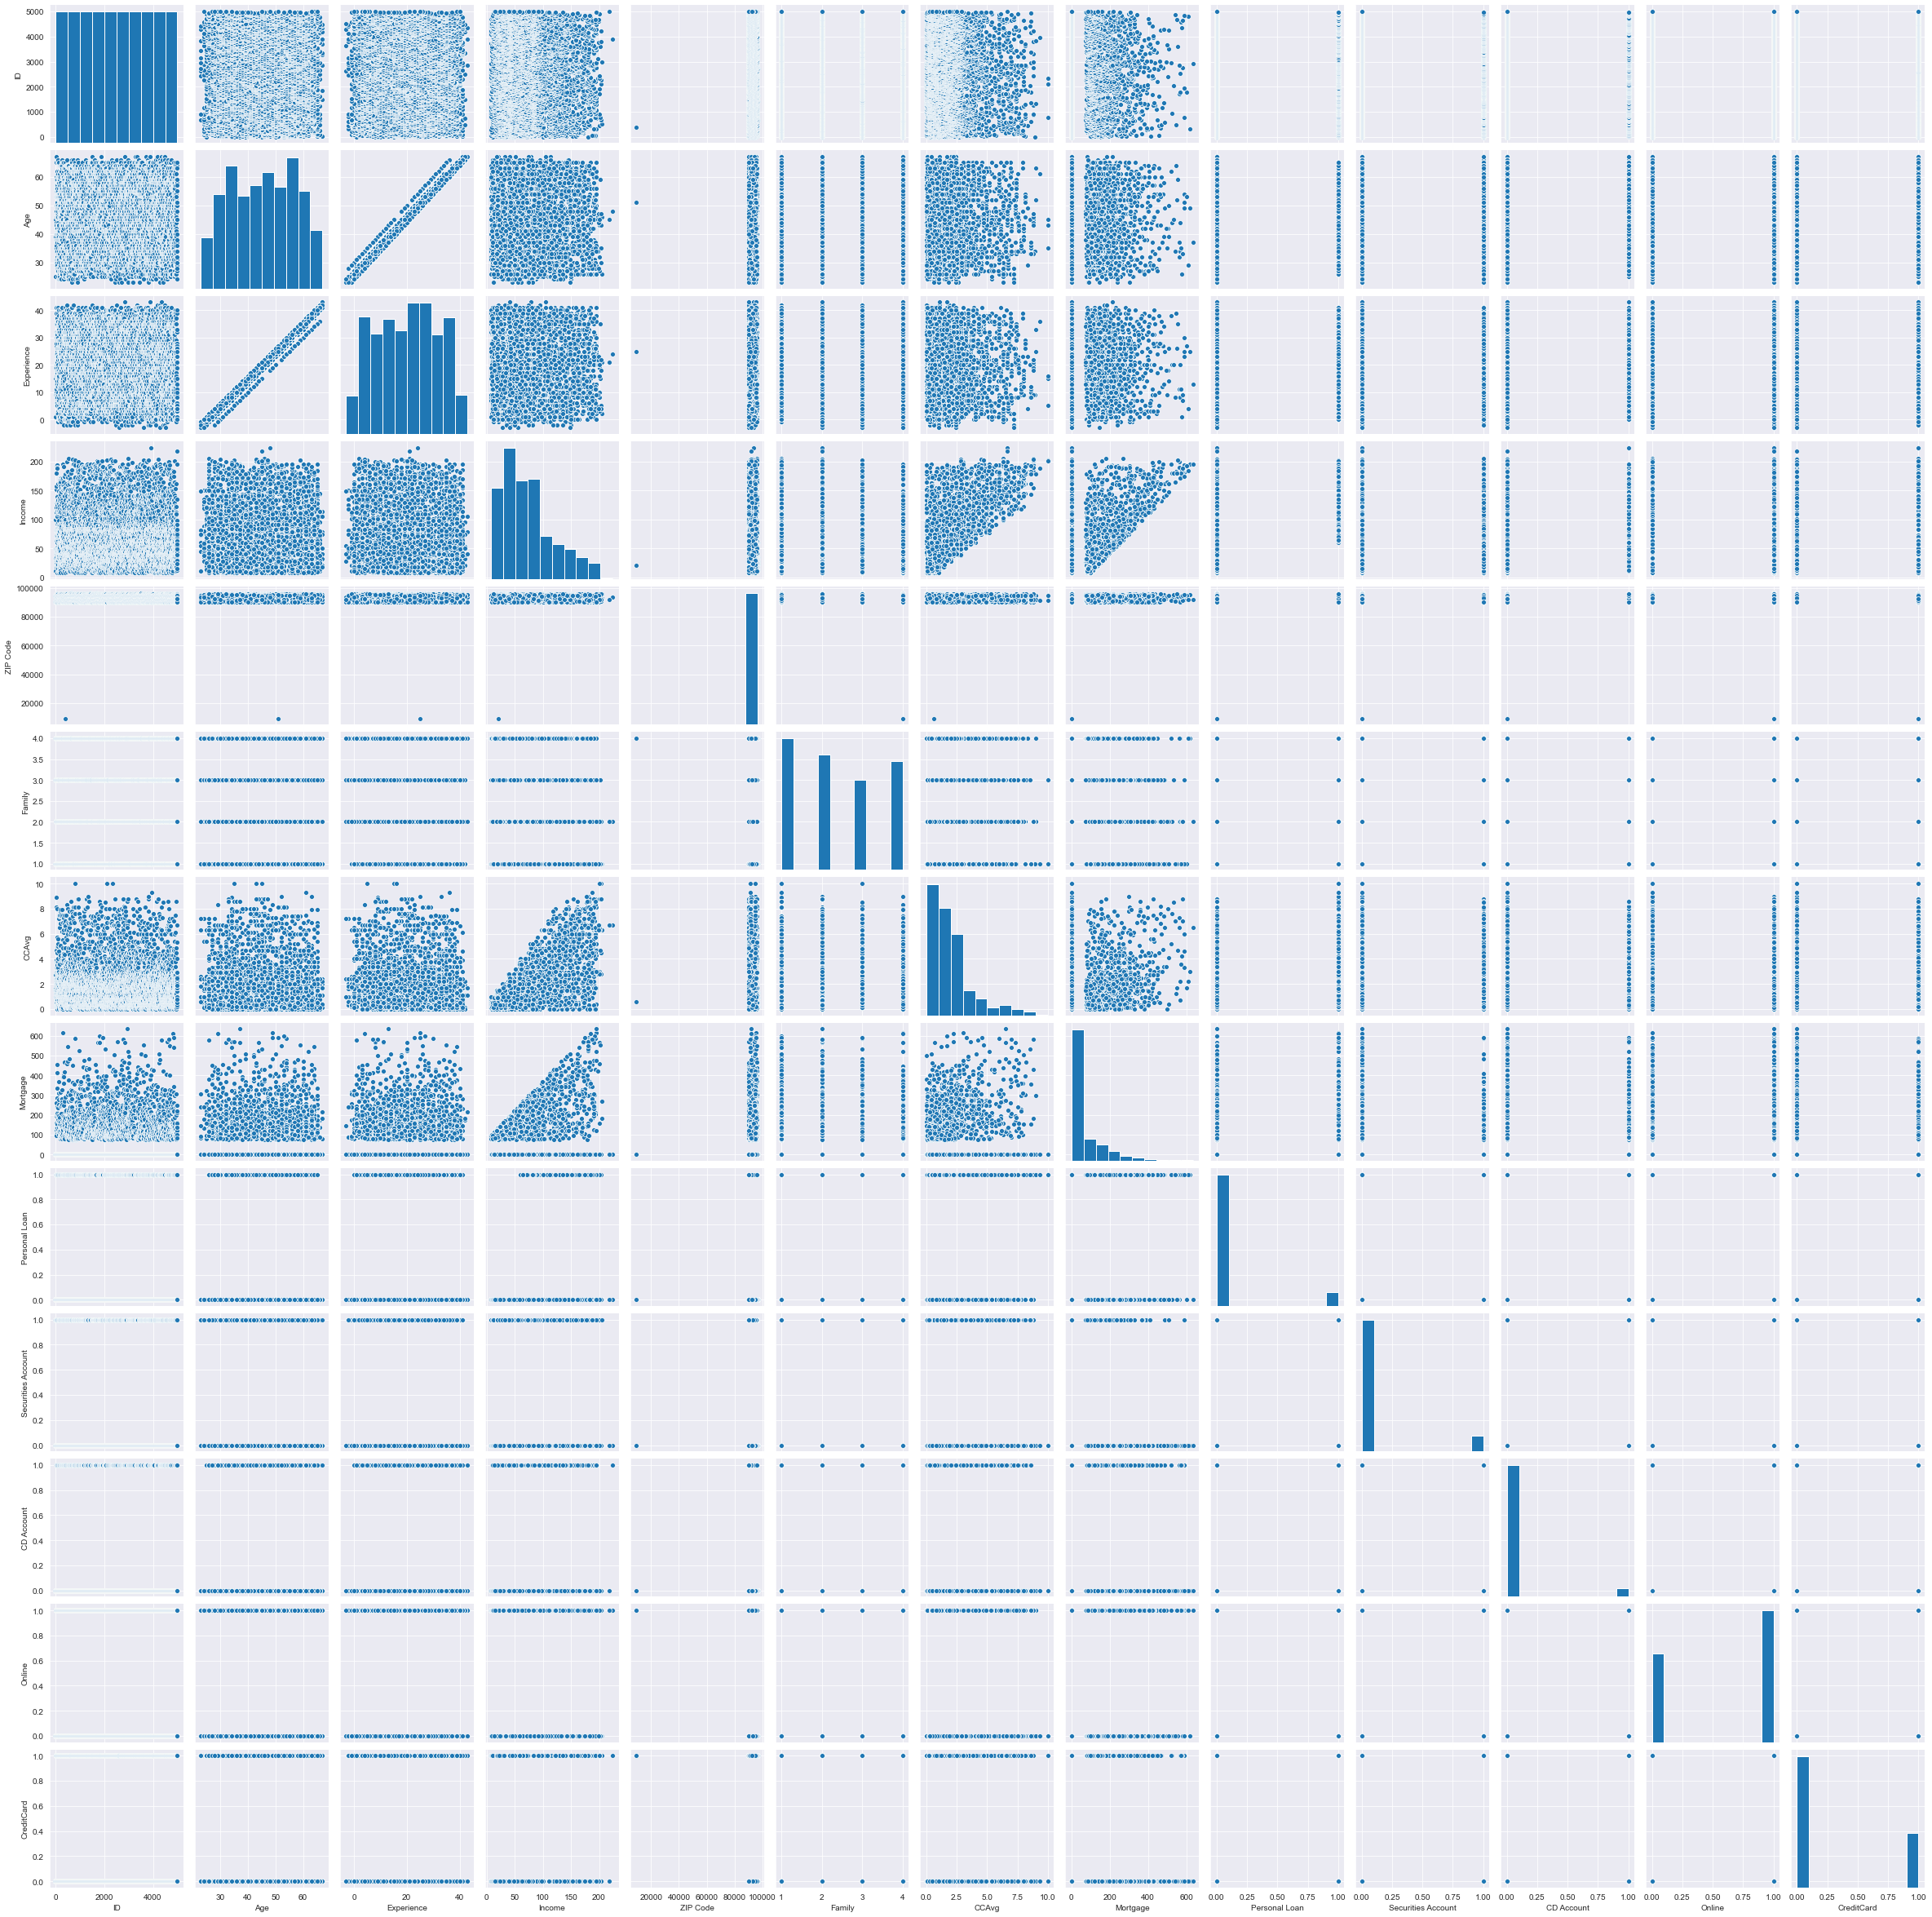

In [35]:
sns.pairplot(df,kind='scatter')

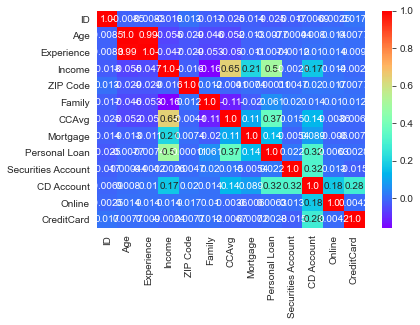

In [36]:
## Heatmap relationship between all features in the data set
sns.heatmap(df.corr(),annot=True,cmap='rainbow',fmt='.2')

           DATA PREPARATION

In [37]:
# "Experience" column has -ve values which is not possible. 
# The -ve values seem to be in the same range as other values. So, May be Typo Errors
# Convert all negative values in the 'Experience' column into positive
df['Experience']=df['Experience'].abs()

# One hot encoding of Categorical Column 'Education'
df=pd.get_dummies(df,columns=['Education'])
df=df.drop('Education_AP',axis=1)
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_G,Education_UG
0,1,25,1,49,91107,4,1.6,0,0,1,0,0,0,0,1
1,2,45,19,34,90089,3,1.5,0,0,1,0,0,0,0,1
2,3,39,15,11,94720,1,1.0,0,0,0,0,0,0,0,1
3,4,35,9,100,94112,1,2.7,0,0,0,0,0,0,1,0
4,5,35,8,45,91330,4,1.0,0,0,0,0,0,1,1,0


        DATA MODELLING

In [38]:
##This is clearly a case of Logistic Regression model with Class Outputs
## Split the data into Train and Test data (70:30)

X=df.drop('Personal Loan',axis=1)
y=df['Personal Loan']

## Create model with class_weight parameter to account for Imbalanced class outputs
logistic_model=LogisticRegression(class_weight='balanced')
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=49)
logistic_model.fit(X_train,y_train)


LogisticRegression(class_weight='balanced')

In [39]:
## For test data show all the rows where the predicted class is not equal to the observed class
y_test=pd.DataFrame(y_test)
y_pred=logistic_model.predict(X_test)
y_pred=pd.DataFrame(y_pred,columns=['Personal_Loan_Pred'])
y_pred.head()
join_df=pd.concat([X_test,y_test],axis=1,join='inner')
join_df.reset_index(drop=True,inplace=True)

join_df=pd.concat([join_df,y_pred],axis=1,join='inner')
join_df
error_df=join_df.loc[join_df['Personal Loan'] != join_df['Personal_Loan_Pred']]
error_df.reset_index(drop=True,inplace=True)
error_df


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_G,Education_UG,Personal Loan,Personal_Loan_Pred
0,228,47,23,148,94551,2,7.5,0,0,1,1,1,0,1,0,1
1,4277,50,24,155,92717,1,7.3,0,0,0,1,1,0,1,0,1
2,1734,40,16,125,95125,2,2.2,0,0,0,1,0,0,1,0,1
3,642,35,10,139,95060,2,7.8,0,0,0,0,0,0,1,0,1
4,431,51,26,113,94086,1,1.3,161,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,1063,47,21,83,92220,1,3.8,97,0,0,0,0,0,1,1,0
195,4654,34,10,155,92780,2,6.5,0,0,0,1,1,0,1,0,1
196,2631,63,37,113,94611,4,1.7,0,0,0,1,1,0,0,0,1
197,2232,46,20,134,94575,1,5.7,146,1,0,1,0,0,1,0,1


In [40]:
# Find out coefficients of all the attributes and show the output in a data frame with column names? 
coef_list=[]
col_list=[]
for i,col in enumerate(X_train.columns):
    coef_list.append(logistic_model.coef_[0][i])
    col_list.append(col)

coef_df=pd.DataFrame({'Attributes':col_list, 'Coeff':coef_list})
new_row={'Attributes':'Intercept','Coeff':logistic_model.intercept_}
coef_df.append(new_row,ignore_index=True)

,Attributes,Coeff
0,ID,-8.38478e-05
1,Age,-0.000285472
2,Experience,-0.000300188
3,Income,0.0473421
4,ZIP Code,-5.17926e-05
5,Family,0.000234441
6,CCAvg,0.00138165
7,Mortgage,0.000136577
8,Securities Account,1.56668e-05
9,CD Account,0.000171804


In [41]:
train_score=logistic_model.score(X_train,y_train)
test_score=logistic_model.score(X_test,y_test)
print("In Sample Model Score : {}".format(train_score))
print("Out of Sample Model Score : {}".format(test_score))

In Sample Model Score : 0.8414285714285714
Out of Sample Model Score : 0.8673333333333333


Predicted     0    1
Actual              
0          1181  183
1            16  120


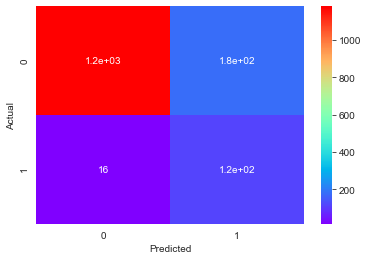

In [42]:
## Confusion Matrix 

confusion_matrix=pd.crosstab(join_df['Personal Loan'],join_df['Personal_Loan_Pred'],rownames=['Actual'],colnames=['Predicted'])
print(confusion_matrix)
sns.heatmap(confusion_matrix,annot=True,cmap='rainbow')

#### Business Understanding of the Model
True Positive (TP) -120- We correctly Predicted that the customer will accept the Personal Loan

True Negative (TN) -1200- We correctly Predicted that the customer will not accept the Personal loan

False Positive (FP) Type 1 Error-180- We incorrectly predicted , the customer will take a Personal loan but actually did not !

False Negative (FN) Type 2 Error-16- We incorrectly predicted , the customer will not take a Personal Loan but actually did !

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test,logistic_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.87      0.92      1364
           1       0.40      0.88      0.55       136

    accuracy                           0.87      1500
   macro avg       0.69      0.87      0.73      1500
weighted avg       0.93      0.87      0.89      1500



In [48]:
## roc_auc_score
## For roc curve, predict the probabilities of data point , rather than the actual classes
from sklearn.metrics import roc_auc_score,roc_curve
y_prob=logistic_model.predict_proba(X_test)
tpr,fpr,thres = roc_curve(y_test,y_prob[:,1],pos_label=1)
auc_score=roc_auc_score(y_test,y_prob[:,1])
print("The AUC score for this Logit Model is {}".format(auc_score))

The AUC score for this Logit Model is 0.9330257029498016


The AUC score is high, close to 1. So, we can say that this Logit Model is performs well in distinguishing positives from negative classes